<a href="https://colab.research.google.com/github/christopher-reed/tidytuesday/blob/master/2021/week_12/TidyTuesday_Steam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Packages and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-03-16/games.csv')

df.head()

,gamename,year,month,avg,gain,peak,avg_peak_perc
0,Counter-Strike: Global Offensive,2021,February,741013.24,-2196.42,1123485,65.9567%
1,Dota 2,2021,February,404832.13,-27839.52,651615,62.1275%
2,PLAYERUNKNOWN'S BATTLEGROUNDS,2021,February,198957.52,-2289.67,447390,44.4707%
3,Apex Legends,2021,February,120982.64,49215.90,196799,61.4752%
4,Rust,2021,February,117742.27,-24374.98,224276,52.4988%


# Wrangle

In [3]:
# Convert year and month name to datetime
df['date'] = pd.to_datetime(df['year'].astype(str) + df['month'],
                            format = '%Y%B')

# Find the average of avg among all games. Same for peak value.
df_mean = df.groupby(['date']).mean().reset_index()
df_mean = df_mean[['date', 'avg', 'peak']]

# Label pre and post pandemic.
# Consider start of pandemic in January when first cases appeared in US
df_mean['covid'] = np.where(df_mean['date'] >= '2020-01-01', True, False)


# Inspect
df_mean.head()

,date,avg,peak,covid
0,2012-07-01,1978.302808,3542.911330,False
1,2012-08-01,1755.391822,3522.098131,False
2,2012-09-01,1852.443723,3879.142857,False
3,2012-10-01,1619.247592,3927.146939,False
4,2012-11-01,1646.930310,3659.232558,False


# Plot

Colors from: https://coolors.co/

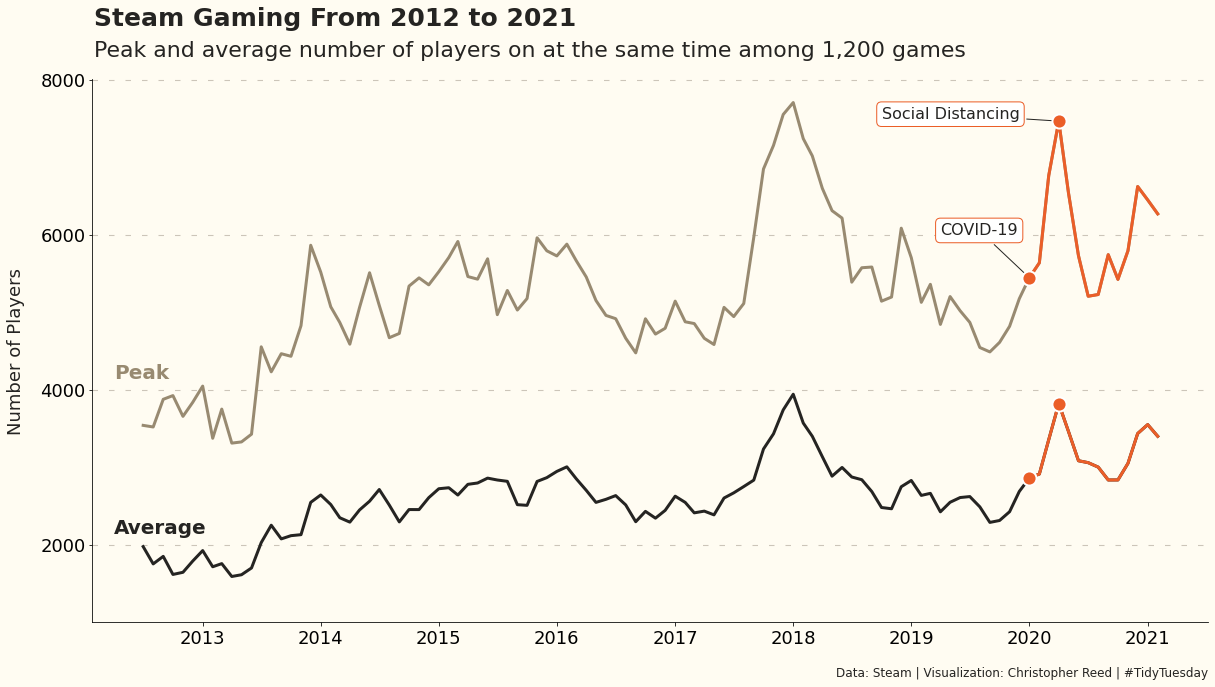

In [4]:
fig, ax = plt.subplots(figsize = (20, 10))

#############
## AVERAGE ##
#############

ax.plot(df_mean['date'],
        df_mean['avg'],
        lw = 3, 
        color = '#252422')

ax.plot(df_mean[df_mean['covid'] == True]['date'],
        df_mean[df_mean['covid'] == True]['avg'],
        lw = 3,
        color = '#EB5E28')

##########
## PEAK ##
##########

ax.plot(df_mean['date'],
        df_mean['peak'],
        lw = 3, 
        color = '#988A71')

ax.plot(df_mean[df_mean['covid'] == True]['date'],
        df_mean[df_mean['covid'] == True]['peak'],
        lw = 3,
        color = '#EB5E28')

############
## POINTS ##
############

# Start covid
df_covid_start = (df_mean[df_mean['date'] == '2020-01-01'].
                  drop(columns = 'covid').
                  melt(id_vars = 'date'))

ax.scatter(df_covid_start['date'],
           df_covid_start['value'],
           lw = 2,
           color = '#EB5E28',
           edgecolor = 'white',
           s = 200,
           zorder = 10)

df_social_distance_start = (df_mean[df_mean['date'] == '2020-04-01'].
                            drop(columns = 'covid').
                            melt(id_vars = 'date'))

ax.scatter(df_social_distance_start['date'],
           df_social_distance_start['value'],
           lw = 2,
           color = '#EB5E28',
           edgecolor = 'white',
           s = 200,
           zorder = 10)

################
## GRID LINES ##
################

# For loose dashed gridlines can pass tuple: https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/linestyles.html
ax.grid(axis = 'y',
        which = 'major',
        ls = (0, (5, 10)),
        lw = 1.1,
        color = '#CCC5B9')

###########
## TICKS ##
###########

ax.set_yticks(np.arange(0,10000, 2000))
ax.set_ylim(bottom = 1000)

ax.tick_params(axis = 'both',
               labelsize = 18)

###########################
## AXIS LABELS AND TITLE ##
###########################

ax.set_ylabel('Number of Players',
              color = '#252422',
              fontsize = 18,
              labelpad = 15)

ax.text(x = pd.to_datetime('2012-02-01'),
        y = 8700,
        s = 'Steam Gaming From 2012 to 2021',
        color = '#252422',
        fontsize = 25,
        weight = 'bold')

ax.text(x = pd.to_datetime('2012-02-01'),
        y = 8300,
        s = 'Peak and average number of players on at the same time among 1,200 games',
        color = '#252422',
        fontsize = 22)

#################
## ANNOTATIONS ##
#################

# Peak label
ax.text(x = pd.to_datetime('2012-04-01'),
        y = 4150,
        s = 'Peak',
        fontsize = 20,
        weight = 'bold',
        color = '#988A71')

# Average label
ax.text(x = pd.to_datetime('2012-04-01'),
        y = 2150,
        s = 'Average',
        fontsize = 20,
        weight = 'bold',
        color = '#252422')

## Use `df_covid_start` and `df_social_distance_start` to get tuples of scatter points
covid_start_points = list((df_covid_start.
                           drop(columns = 'variable').
                           itertuples(index = False)))[1]

social_distance_start_points = list((df_social_distance_start.
                           drop(columns = 'variable').
                           itertuples(index = False)))[1]                           

# Covid annotation
ax.annotate('COVID-19',
            xy = covid_start_points, xycoords = 'data',
            xytext = (pd.to_datetime('2019-04-01'), 6000), textcoords = 'data',
            fontsize = 16,
            color = '#252422',
            arrowprops = dict(arrowstyle = '-',
                            connectionstyle = 'arc3',
                            color = '#252422'),
            bbox = dict(boxstyle = 'Round,pad=0.3',
                        facecolor ='white',
                        edgecolor = '#EB5E28'))

# Social distance annotation
ax.annotate('Social Distancing',
            xy = social_distance_start_points, xycoords = 'data',
            xytext = (pd.to_datetime('2018-10-01'), 7500), textcoords = 'data',
            fontsize = 16,
            color = '#252422',
            arrowprops = dict(arrowstyle = '-',
                            connectionstyle = 'arc3',
                            color = '#252422'),
            bbox = dict(boxstyle = 'Round,pad=0.3',
                        facecolor ='white',
                        edgecolor = '#EB5E28'))

#############
## CREDITS ##
#############

ax.text(x = 1,
        y = -0.1,
        s = 'Data: Steam | Visualization: Christopher Reed | #TidyTuesday',
        color = '#252422',
        ha = 'right',
        fontsize = 12,
        transform = ax.transAxes)

###########################
## ADDITIONAL FORMATTING ##
###########################

ax.set_facecolor('#FFFCF2')
fig.set_facecolor('#FFFCF2')

ax = sns.despine()

plt.savefig('Steam Gaming',
            facecolor = '#FFFCF2',
            box_inches = 'tight')